# QEMC Algorithm - Requried Shots Scaling

**Ohad Lev**

**September 2023**

In the QEMC paper [[1]](#References), there appear empirical findings about the nature of the scaling of required quantum circuit executions ("shots") per cost function evaluation. These findings are concluded into *Fig. 9b* in the QEMC paper [[1]](#References):

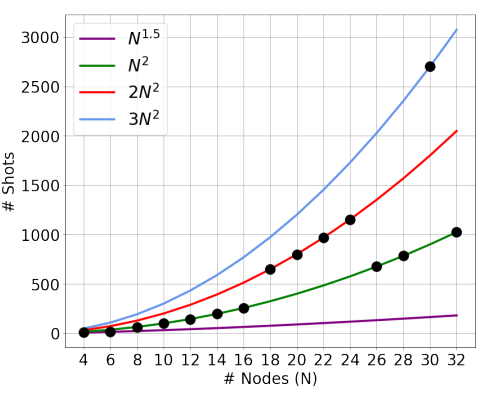

The data points in the figure are corollaries of executing the QEMC algorithm on a noiseless simulator for $3$-regular graphs. For each graph instance with $N$ nodes, QEMC executions have been performed with optimal hyperparameters obtained a-priori by grid search, as detailed in the *Supplementary Material* section of [[1]](#References). For each graph instance, the number of shots performed in each QEMC execution started from $N^{1.5}$, and was gradually increased to $N^2 \rightarrow 2N^2 \rightarrow 3N^2$. When the cut obtained by QEMC overcame the cut achieved by the classical GW algorithm [[2]](#Referecnes), the process has been terminated and the data point has been recorded. The number of QEMC iterations has been set to $300$.

The process detailed above has been performed while assuming that the number of "blue" nodes in the graph partition is $B = \frac{N}{2}$. In this report we are interested in the following question:

<div class="alert alert-block alert-info" style="font-weight: bold;">
    <center>
        How the number of required shots for a single QEMC cost function evaluation scales as a function of $B$ (when $B$ is being determined a-priori)?
    </center>
</div>

## Reproducing the Results from the QEMC paper [[1]](#References)

We begin by setting up the stage for reproducing the results from the QEMC paper [[1]](#References) for a $3$-regular graph with $N = 32$ nodes. First, we generate a random graph with these properties:

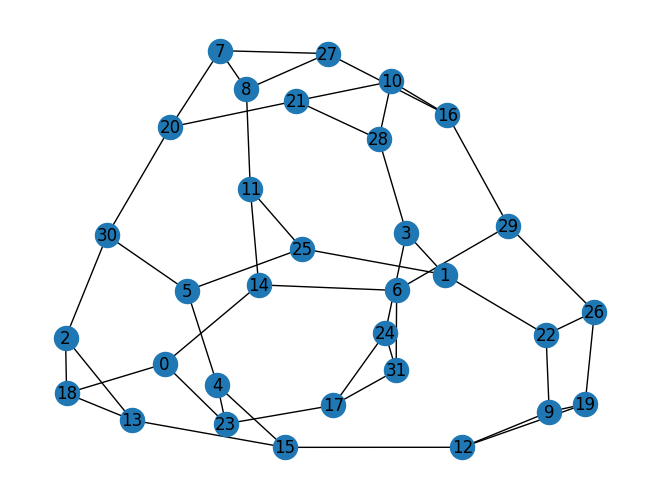

In [22]:
import networkx as nx

DEGREE = 3
NUM_NODES = 2 ** 5

graph = nx.random_regular_graph(DEGREE, NUM_NODES)
pos = nx.circular_layout(graph)

nx.draw(graph, with_labels=True)#, pos=pos)

Second, we apply a randomized partition algorithm with no limitations at all:

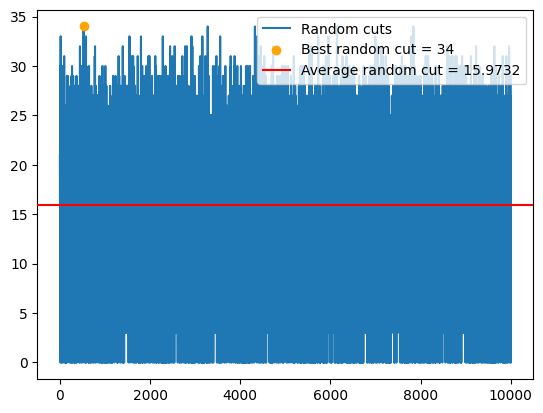

In [23]:
import matplotlib.pyplot as plt

from online_qemc.classical_solvers import get_random_cut


# NUM_BLUE_NODES = int(NUM_NODES / 2)
num_random_iters = 10_000

cuts, avg_cut, max_random_cut, index_max_random_cut = get_random_cut(graph, num_random_iters)

plt.plot(range(num_random_iters), cuts, label=f"Random cuts")
plt.scatter(index_max_random_cut, max_random_cut, color="orange", zorder=2, label=f"Best random cut = {max_random_cut}")
plt.axhline(avg_cut, color="red", zorder=3, label=f"Average random cut = {avg_cut}")

plt.legend()

Then we execute QEMC with $B = \frac{N}{2}$:

In [25]:
from qemc_implementation import QEMC

qemc_solver = QEMC(graph)
qemc_solver.construct_ansatz(num_layers=5)
qemc_solver.run(shots=10_000)

QEMCResult(optimizer_result= message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.08918043999999999
       x: [ 5.982e+00  2.983e+00 ...  4.025e+00  2.454e+00]
    nfev: 592
   maxcv: 0.0, best_counts={'01111': 29, '10101': 68, '01101': 670, '10010': 332, '11100': 137, '10000': 113, '11110': 138, '00001': 458, '00110': 119, '01000': 411, '01100': 557, '01001': 436, '10001': 429, '00101': 124, '11010': 241, '00000': 40, '11001': 917, '01010': 765, '11101': 617, '11011': 204, '11111': 751, '11000': 308, '10111': 238, '10100': 470, '01110': 479, '00010': 200, '10110': 70, '00100': 423, '00111': 62, '00011': 37, '10011': 87, '01011': 70}, best_params=array([ 5.98160011,  2.98146677,  3.20968873,  6.43487258,  1.29037725,
        0.99945504,  4.04489135,  1.51018323,  4.86823935,  5.28136526,
        6.72059128,  4.89300456,  5.41152963,  2.07560179,  2.63400415,
        2.77163747,  5.91954334,  4.51692979,  3.73567816,  2.51732692,
        1.33948812,  0.8

Now, we apply a randomized partition algorithm with the limitation of $B = 3$:

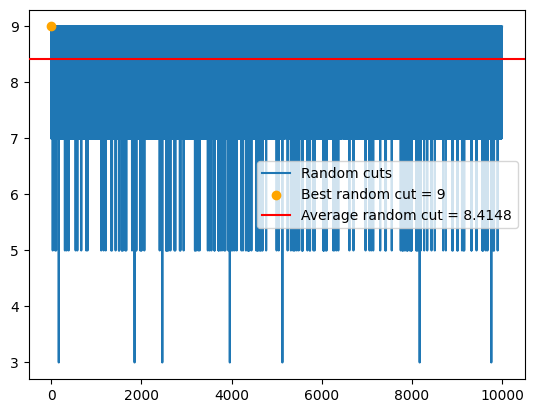

In [114]:
cuts_b3, avg_cut_b3, max_random_cut_b3, index_max_random_cut_b3 = get_random_cut(graph, num_random_iters, num_blue_nodes=3)

plt.plot(range(num_random_iters), cuts_b3, label="Random cuts")
plt.scatter(
    index_max_random_cut_b3,
    max_random_cut_b3,
    color="orange",
    zorder=2,
    label=f"Best random cut = {max_random_cut_b3}"
)
plt.axhline(avg_cut_b3, color="red", zorder=3, label=f"Average random cut = {avg_cut_b3}")

plt.legend()

In [115]:
8.4148 / 9

0.9349777777777777

What we have expected happend. Since the graph is sparse and $B << N$, a randmized partition with a fixed $B$ is likely to be optimal (it is easy to understand that for a $3$-regular graph with $B = 3$ and $B << N$, the optimal cut is $9$).

## Looking at Dense Graphs

As demonstrated in the previous section, finding the $(B, N-B)$-MaxCut of a $d$-regular graph, where $d, B << N$ is easy. So now, we try performing the same analysis for a random $16$-regular ($d = 16 = \frac{N}{2}$, i.e a dense graph):

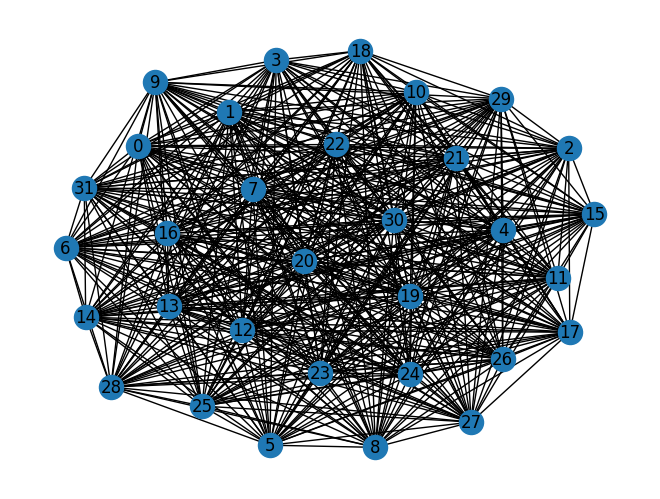

In [42]:
DENSE_DEG = int(NUM_NODES - 2)

dense_graph = nx.random_regular_graph(DENSE_DEG, NUM_NODES)

nx.draw(dense_graph, with_labels=True)

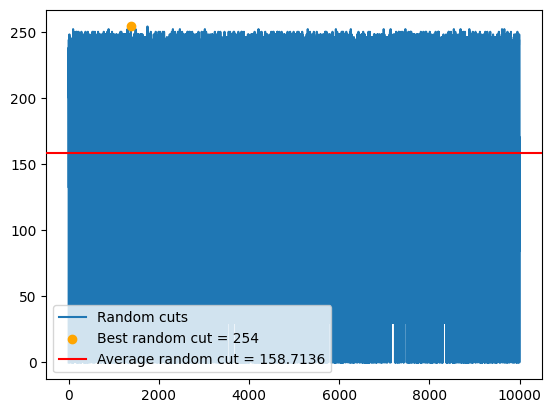

In [48]:
dense_cuts, dense_avg_cut, dense_max_random_cut, dense_index_max_random_cut = get_random_cut(dense_graph, num_random_iters)

plt.plot(range(num_random_iters), dense_cuts, label=f"Random cuts")
plt.scatter(
    dense_index_max_random_cut,
    dense_max_random_cut,
    color="orange",
    zorder=2,
    label=f"Best random cut = {dense_max_random_cut}"
)
plt.axhline(dense_avg_cut, color="red", zorder=3, label=f"Average random cut = {dense_avg_cut}")

plt.legend()

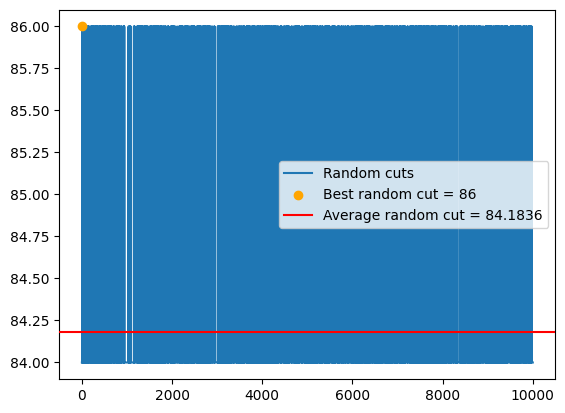

In [51]:
dense_cuts_b3, dense_avg_cut_b3, dense_max_random_cut_b3, dense_index_max_random_cut_b3 = get_random_cut(
    dense_graph,
    num_random_iters,
    num_blue_nodes=3
)

plt.plot(range(num_random_iters), dense_cuts_b3, label=f"Random cuts")
plt.scatter(
    dense_index_max_random_cut_b3,
    dense_max_random_cut_b3,
    color="orange",
    zorder=2,
    label=f"Best random cut = {dense_max_random_cut_b3}"
)
plt.axhline(dense_avg_cut_b3, color="red", zorder=3, label=f"Average random cut = {dense_avg_cut_b3}")

plt.legend()

---------------

--------------

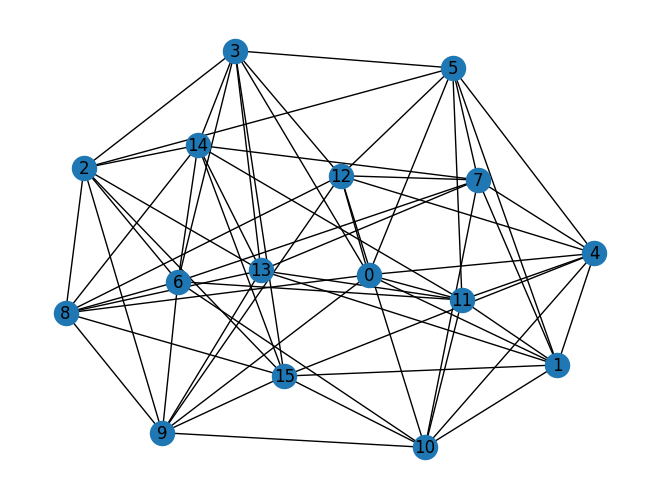

In [102]:
rand_small_graph = nx.random_regular_graph(8, 16)

nx.draw(rand_small_graph, with_labels=True)

In [104]:
from classical_functions import brute_force_maxcut

brute_force_maxcut(rand_small_graph).best_score

46

In [105]:
from online_qemc.classical_solvers import get_maxcut_brute_force

get_maxcut_brute_force(rand_small_graph)

('0111100111010000', 46)

In [106]:
get_maxcut_brute_force(rand_small_graph, blue_nodes=3)

('0000000000001101', 24)

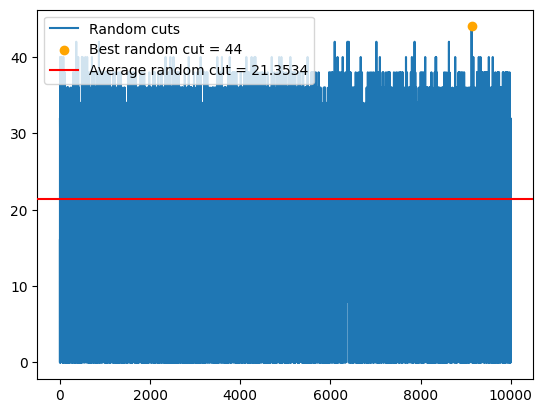

In [107]:
small_cuts, small_avg_cut, small_max_random_cut, small_index_max_random_cut = get_random_cut(
    rand_small_graph,
    num_random_iters
)

plt.plot(range(num_random_iters), small_cuts, label=f"Random cuts")
plt.scatter(
    small_index_max_random_cut,
    small_max_random_cut,
    color="orange",
    zorder=2,
    label=f"Best random cut = {small_max_random_cut}"
)
plt.axhline(small_avg_cut, color="red", zorder=3, label=f"Average random cut = {small_avg_cut}")

plt.legend()

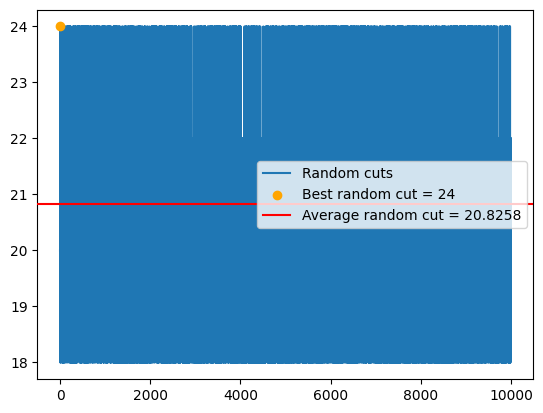

In [110]:
small_cuts_b3, small_avg_cut_b3, small_max_random_cut_b3, small_index_max_random_cut_b3 = get_random_cut(
    rand_small_graph,
    num_random_iters,
    num_blue_nodes=3
)

plt.plot(range(num_random_iters), small_cuts_b3, label=f"Random cuts")
plt.scatter(
    small_index_max_random_cut_b3,
    small_max_random_cut_b3,
    color="orange",
    zorder=2,
    label=f"Best random cut = {small_max_random_cut_b3}"
)
plt.axhline(small_avg_cut_b3, color="red", zorder=3, label=f"Average random cut = {small_avg_cut_b3}")

plt.legend()

In [111]:
20.8 / 24

0.8666666666666667

--------------------------------------

Connected? True
Number of edges = 56


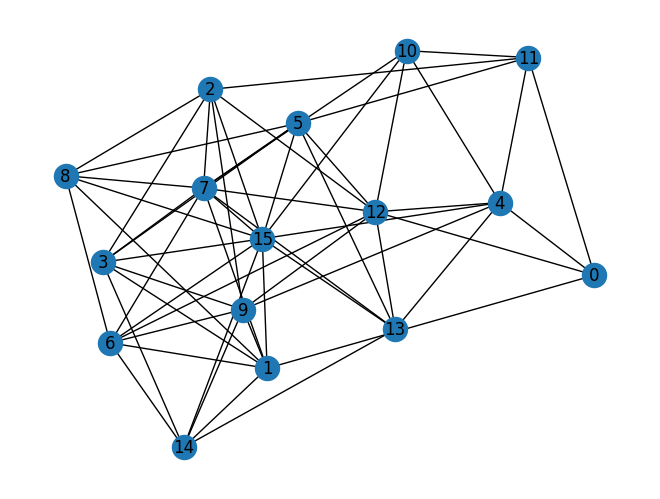

In [93]:
er_graph = nx.erdos_renyi_graph(n=16, p=0.5)
nx.draw(er_graph, with_labels=True)

print(f"Connected? {nx.is_connected(er_graph)}")
print(f"Number of edges = {er_graph.number_of_edges()}")

In [94]:
get_maxcut_brute_force(er_graph)

('0000000111011011', 40)

In [96]:
get_maxcut_brute_force(er_graph, blue_nodes=3)

('0000000100001001', 26)

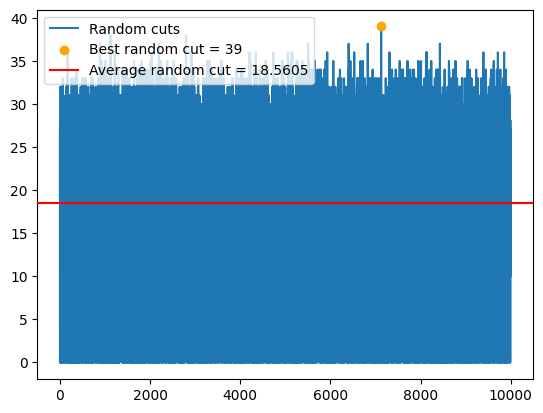

In [97]:
er_cuts, er_avg_cut, er_max_random_cut, er_index_max_random_cut = get_random_cut(
    er_graph,
    num_random_iters
)

plt.plot(range(num_random_iters), er_cuts, label=f"Random cuts")
plt.scatter(
    er_index_max_random_cut,
    er_max_random_cut,
    color="orange",
    zorder=2,
    label=f"Best random cut = {er_max_random_cut}"
)
plt.axhline(er_avg_cut, color="red", zorder=3, label=f"Average random cut = {er_avg_cut}")

plt.legend()

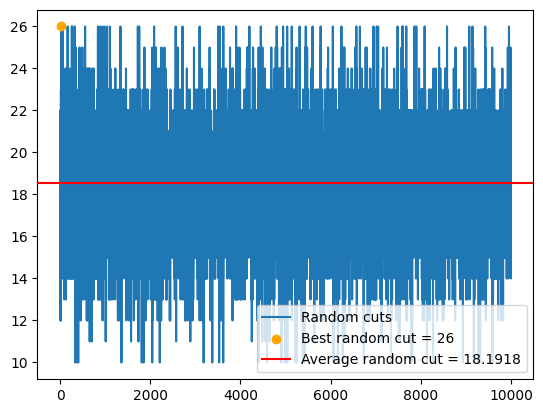

In [98]:
er_cuts_b3, er_avg_cut_b3, er_max_random_cut_b3, er_index_max_random_cut_b3 = get_random_cut(
    er_graph,
    num_random_iters,
    num_blue_nodes=3
)

plt.plot(range(num_random_iters), er_cuts_b3, label=f"Random cuts")
plt.scatter(
    er_index_max_random_cut_b3,
    er_max_random_cut_b3,
    color="orange",
    zorder=2,
    label=f"Best random cut = {er_max_random_cut_b3}"
)
plt.axhline(er_avg_cut, color="red", zorder=3, label=f"Average random cut = {er_avg_cut_b3}")

plt.legend()

In [112]:
18.2 / 26

0.7

In [101]:
26 / 30

0.8666666666666667

----------

## References

[[1]](https://arxiv.org/abs/2308.10383) Tene-Cohen, Y., Kelman, T., Lev, O., & Makmal, A. (2023). **A Variational Qubit-Efficient MaxCut Heuristic Algorithm**. arXiv preprint arXiv:2308.10383.

[[2]](https://dl.acm.org/doi/abs/10.1145/227683.227684) Goemans, Michel X., and David P. Williamson. "**Improved approximation algorithms for maximum cut and satisfiability problems using semidefinite programming.**" Journal of the ACM (JACM) 42.6 (1995): 1115-1145.